# A REPORT ON THE GLOBAL STATE OF HUMAN TRAFFICKING

CODE to import necessary libraries.

In [1]:
import os
import sqlite3
import csv

import pandas as pd
import numpy as np

import seaborn as sns

CODE to create database and table within the database.

In [2]:
con = sqlite3.connect("GlobalDatasetSept2018.db")
cur = con.cursor()
cur.execute("CREATE TABLE IF NOT EXISTS victims_table (gender STR, majorityEntry STR, majorityStatusAtExploit STR, ageBroad STR, citizenship STR, yearOfRegistration STR, Datasource STR, CountryOfExploitation STR, typeOfExploitConcatenated STR, RecruiterRelationship STR)")

CODE to transfer columns of data from csv file to new database.

In [3]:
with open('Global_Dataset_3_Sept_2018.csv','r') as victims:
    dr = csv.DictReader(victims)
    to_db = [(i['gender'],
              i['majorityEntry'],
              i['majorityStatusAtExploit'],
              i['ageBroad'],
              i['citizenship'],
              i['yearOfRegistration'],
              i['Datasource'],
              i['CountryOfExploitation'],
              i['typeOfExploitConcatenated'],
              i['RecruiterRelationship']) for i in dr]
    cur.executemany(
        "INSERT INTO victims_table VALUES "
        "(?, ?, ?, ?, ?, ?, ?, ?, ?, ?);", to_db)    
    con.commit()

CODE to retrieve data from SQL database into a python object.

In [4]:
df = pd.read_sql("SELECT * FROM victims_table", con)

### ORIGINAL DATABASE

In [5]:
df

,Gender,majorityEntry,majorityStatusAtExploit,ageBroad,citizenship,yearOfRegistration,Datasource,CountryOfExploitation,typeOfExploitConcatenated,recruitment_relation
0,-99,-99,-99,-99,-99,2002,Case Management,-99,-99,None
1,-99,-99,-99,-99,-99,2002,Case Management,-99,-99,None
2,-99,-99,-99,-99,-99,2002,Case Management,-99,-99,None
3,-99,-99,-99,-99,-99,2002,Case Management,-99,-99,None
4,-99,-99,-99,-99,-99,2002,Case Management,-99,-99,None
5,-99,-99,-99,-99,-99,2002,Case Management,-99,-99,None
6,-99,-99,-99,-99,-99,2002,Case Management,-99,-99,None
7,-99,-99,-99,-99,-99,2002,Case Management,-99,-99,None
8,-99,-99,-99,-99,-99,2002,Case Management,-99,-99,None
9,-99,-99,-99,-99,-99,2002,Case Management,-99,-99,None


CODE to replace missing values ("-99") with NaN using Regex.

In [6]:
df.replace(-99, np.nan, regex=True, inplace=True)

CODE to rename columns in SQL database.

In [26]:
df.rename(
    columns={
        'Gender':'Gender',
        'majorityEntry': 'Entry Age',
        'majorityStatusAtExploit': 'Exploitation Age',
        'ageBroad': 'Assistance Age', 
        'citizenship': 'Country Origin', 
        'yearOfRegistration': 'Year Registration', 
        'Datasource': 'Contact Method', 
        'CountryOfExploitation': 'Country Exploitation',
        'typeOfExploitConcatenated': 'Exploitation Type',
        'recruitment_relation': 'Recruiter Relation'
    }, 
    inplace=True)

### TRANSFORMED DATABASE

In [8]:
df

,Gender,Entry Age,Exploitation Age,Assistance Age,Country Origin,Year Registration,Contact Method,Country Exploitation,Exploitation Type,Recruiter Relation
0,NaN,NaN,NaN,NaN,NaN,2002,Case Management,NaN,NaN,None
1,NaN,NaN,NaN,NaN,NaN,2002,Case Management,NaN,NaN,None
2,NaN,NaN,NaN,NaN,NaN,2002,Case Management,NaN,NaN,None
3,NaN,NaN,NaN,NaN,NaN,2002,Case Management,NaN,NaN,None
4,NaN,NaN,NaN,NaN,NaN,2002,Case Management,NaN,NaN,None
5,NaN,NaN,NaN,NaN,NaN,2002,Case Management,NaN,NaN,None
6,NaN,NaN,NaN,NaN,NaN,2002,Case Management,NaN,NaN,None
7,NaN,NaN,NaN,NaN,NaN,2002,Case Management,NaN,NaN,None
8,NaN,NaN,NaN,NaN,NaN,2002,Case Management,NaN,NaN,None
9,NaN,NaN,NaN,NaN,NaN,2002,Case Management,NaN,NaN,None


# Counter-Trafficking Data Collaborative

The Counter-Trafficking Data Collaborative (CTDC) is the first global data hub on human trafficking, publishing harmonized data from counter-trafficking organizations around the world. Launched in November 2017, the goal of CTDC is to break down information-sharing barriers and equip the counter-trafficking community with up to date, reliable data on human trafficking. CTDC data has so far been accessed by users in over 150 countries and territories.

Historically, it has been difficult to make data on human trafficking readily accessible to analysts, academics, practitioners and policy-makers. It is widely recognized that one of the foremost challenges in developing targeted counter-trafficking responses and measuring their impact is the lack of reliable, high-quality information. Data on human trafficking are often highly sensitive, raising a range of privacy and civil liberty concerns where the risk of identifying data subjects can be high and the consequences severe. For the first time, CTDC leverages modern technology to overcome these obstacles allow unprecedented public access to the world’s largest datasets on human trafficking. Bringing together global data in one platform will strengthen and empower local, national and international institutions to eradicate crimes of trafficking and exploitation.

You can stay up to date with Counter-Trafficking Data Collaborative by visiting their site at https://www.ctdatacollaborative.org.

# THE VICTIMS

### YEAR OF REGISTRATION

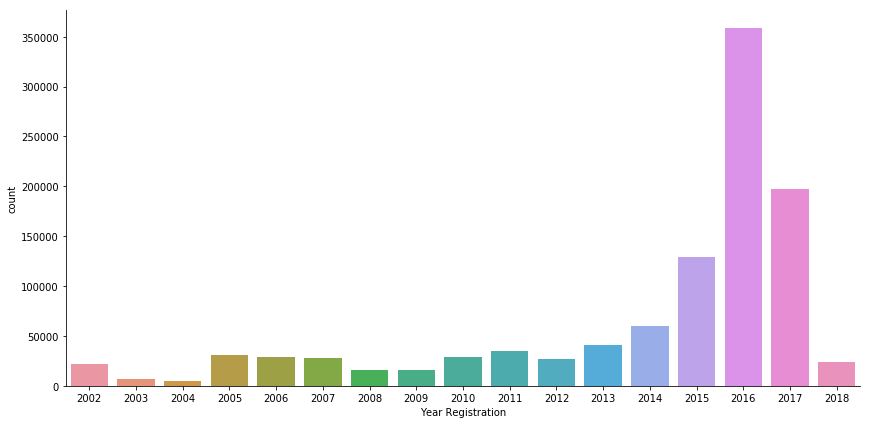

In [9]:
sns.catplot(
    x="Year Registration",
    data=df,
    kind="count",
    height=6,
    aspect=2,
)

The year in which the individual was registered and assisted by IOM or the year in which Polaris first received a report of the individual’s trafficking situation, or the date of entry into Liberty Asia’s VCMS.

This graph reflects the overall trend of reporting over the past 16 years (note this is NOT reflecting the total amount of people trafficked, just the people that have been documented in databases). The catplot shows how few human trafficking reports were submitted from 2002 to 2014. This could be due to a number a factors including limited reporting resources and decreased awareness. The amount of reports significantly increased between 2015 and 2017. The numbers in 2018 are inconclusive being that the report was generated in September of 2018 and even the dataset representing only a fraction of the year of 2018.

### INITIAL CONTACT METHOD BETWEEN VICTIMS AND RESPONDERS

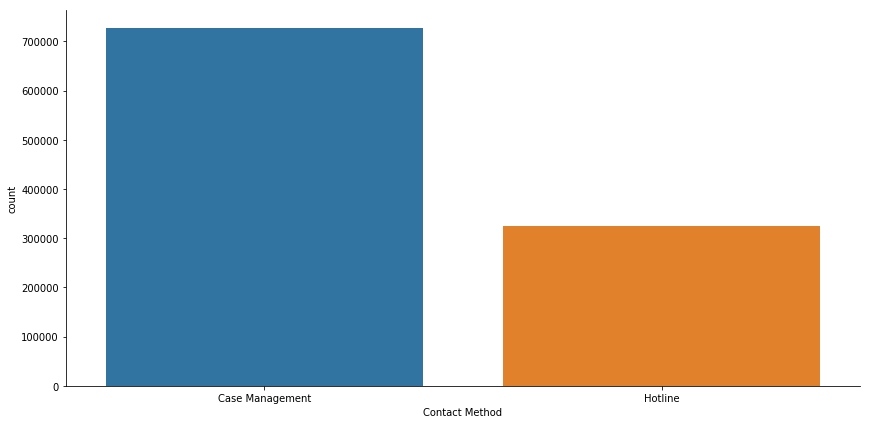

In [10]:
sns.catplot(
    x="Contact Method",
    data=df,
    kind="count",
    height=6,
    aspect=2,
)

Data collection method about the victims, which generally reflects the services provided to victims.

- Case management: Individual recieved social services from an agency in person.
- Hotline: Individual received services, was referred to services, or was reported to a helpline through a remote means of communication such as a phone call, text message, online form report, or email.

# WHO ARE THEY?

### GENDER OF VICTIMS

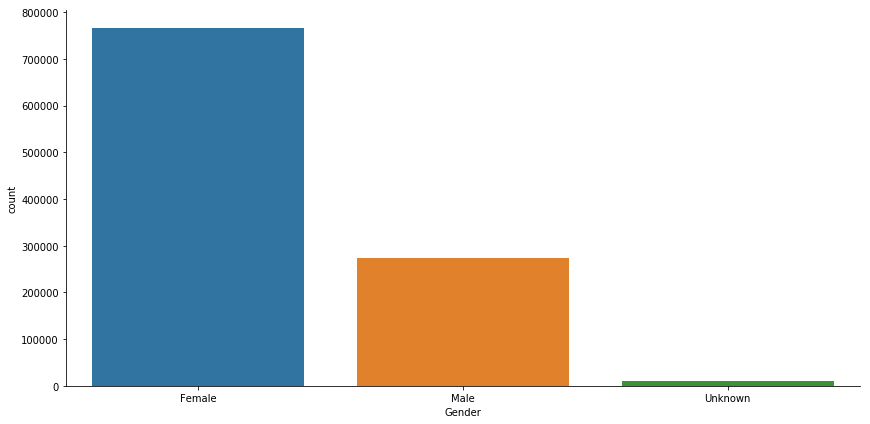

In [11]:
sns.catplot(
    x="Gender",
    data=df,
    kind="count",
    height=6,
    aspect=2,
)

Designates the individual's expression or condition of being male, female, both or neither. This category considers the psychological, behavioral, social, and cultural aspects of being male, female, or non-binary (masculinity, femininity, neither, or a combination of both).

This goes without saying, but though males are, indeed, victims of human trafficking, female victims almost triple the amount of male victims among people being trafficked.

### DATABASE COUNT PER GENDER

In [12]:
pd.read_sql("SELECT Gender, count(Gender) FROM victims_table GROUP BY Gender ORDER BY count(Gender) DESC", con)

,Gender,count(Gender)
0,Female,766669
1,Male,274436
2,Unknown,10051
3,-99,2090


The above table shows the exact number of victims among documented database cases per gender from 2002 until early 2018.

### AGE OF ASSISTANCE

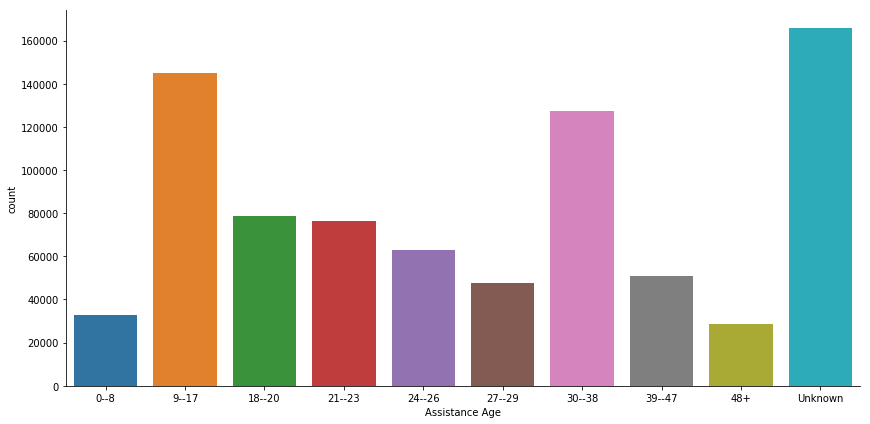

In [13]:
sns.catplot(
    x="Assistance Age",
    data=df,
    kind="count",
    height=6,
    aspect=2,
    order= ('0--8', '9--17', '18--20', '21--23', '24--26', '27--29', '30--38', '39--47', '48+', 'Unknown'),
)

The graph shows the individual's age at the time the individual was registered and assisted by IOM, or Polaris first received a report of the individual’s trafficking situation, or at first point of contact with Liberty Asia’s NGO partner. Note that this is not the age in which someone was first exploited, which means by the time a case is a reported (reflected above in terms of the victims age) the victim could have already been exploited for an extended period of time (e.g. months, years, etc.).

### AGE OF ASSISTANCE PER GENDER

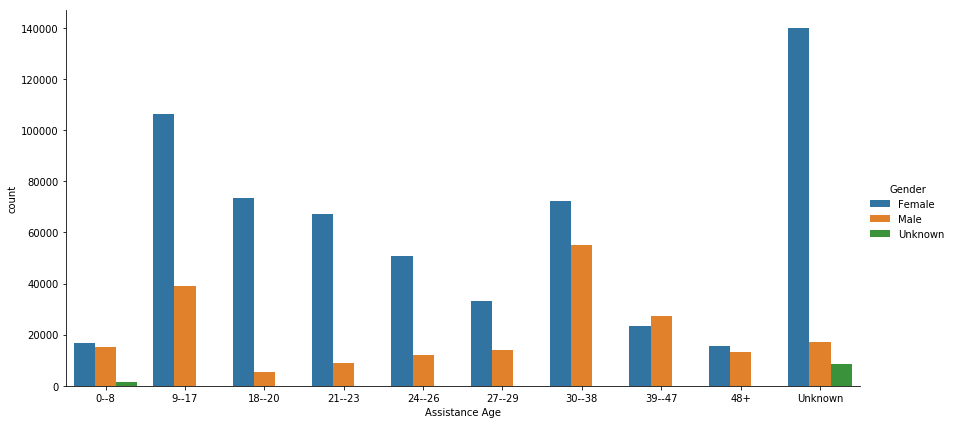

In [14]:
sns.catplot(
    x="Assistance Age",
    hue="Gender",
    data=df,
    kind="count",
    height=6,
    aspect=2,
    order= ('0--8', '9--17', '18--20', '21--23', '24--26', '27--29', '30--38', '39--47', '48+', 'Unknown'),
)

This graph is telling because it shows that the ratio between men and women victims when they are first reported a victim of trafficking is closer to 50% in groups 0-8, 30-38, 39-47, and 48+. But among the ages 9-29 there is a significant more amount of female victims than male victims of human trafficking.

Yet, this graph is slightly misleading because one could immediately assume the greatest number of reported victims is 9-17 years. But if we combine ages 18-29 we get the following output..

### AGE OF ASSISTANCE - COMBINING AGES 18-29

CODE to combine all four groups.

In [15]:
df.loc[(df["Assistance Age"] == "18--20") | 
      (df["Assistance Age"] == "21--23") |
      (df["Assistance Age"] == "24--26") |
      (df["Assistance Age"] == "27--29"),
      "Assistance Age"] = "18--29"

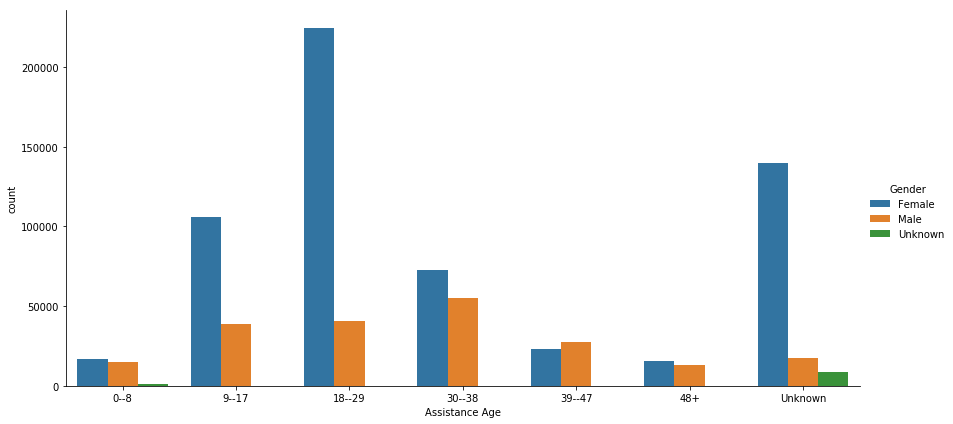

In [16]:
sns.catplot(
    x="Assistance Age",
    hue="Gender",
    data=df,
    kind="count",
    height=6,
    aspect=2,
    order= ('0--8', '9--17', '18--29', '30--38', '39--47', '48+', 'Unknown'),
)

This graph is more accurate concerning the the Age of Assistance among database documented cases because it shows that the vast amount of females are beginning to recieve help between 18-29 years old. Yet, most victims of human trafficking are trafficked before they are 18 years old as the graph below will show. 

### AGE OF EXPLOITATION

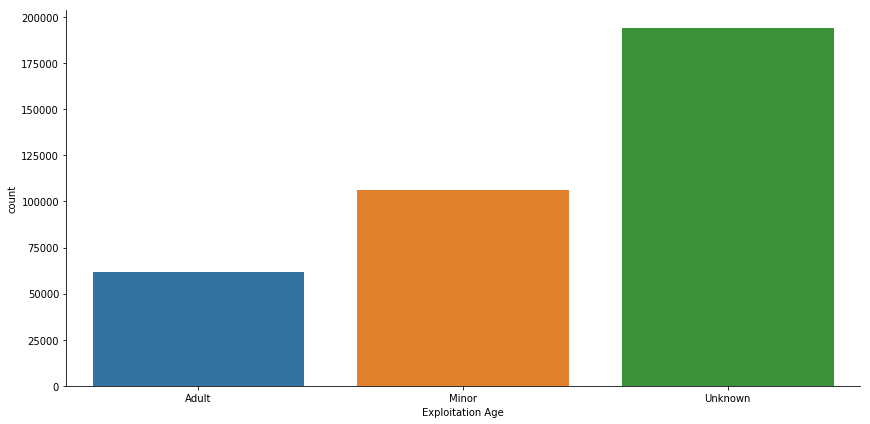

In [17]:
sns.catplot(
    x="Exploitation Age",
    data=df,
    kind="count",
    height=6,
    aspect=2,
)

The individual's age at the time the exploitation of the individual began. Exploitation includes the exploitation of the prostitution of others or other forms of sexual exploitation, forced labour or services, slavery or practices similar to slavery, servitude or the removal of organs. Among known categories, the exploitation age of victims below 18 years of age almost doubles the victims who were exploited at the age of 18+.

This chart shows that, from the database documented cases that we know about, most victims were trafficked before the age of 18. The graph below shows the same graph but distinguishes gender.

### AGE OF EXPLOITATION BASED ON GENDER

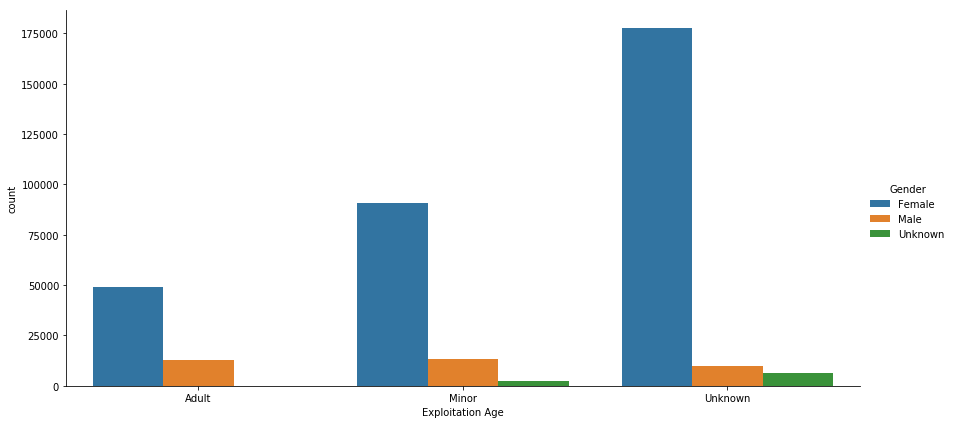

In [18]:
sns.catplot(
    x="Exploitation Age",
    hue="Gender",
    data=df,
    kind="count",
    height=6,
    aspect=2,
)

As you can see in the above graph, males have roughly the same percentage between minors and adults with little variance in the unknown category, but female minors almost double the amount of adult females at the age of exploitation among documented database cases. But with such a high variance regarding unknown females we need to be careful not to come to quick conclusions being that it is possible for female adults to exceed female minors.

### COUNTRY OF ORIGIN

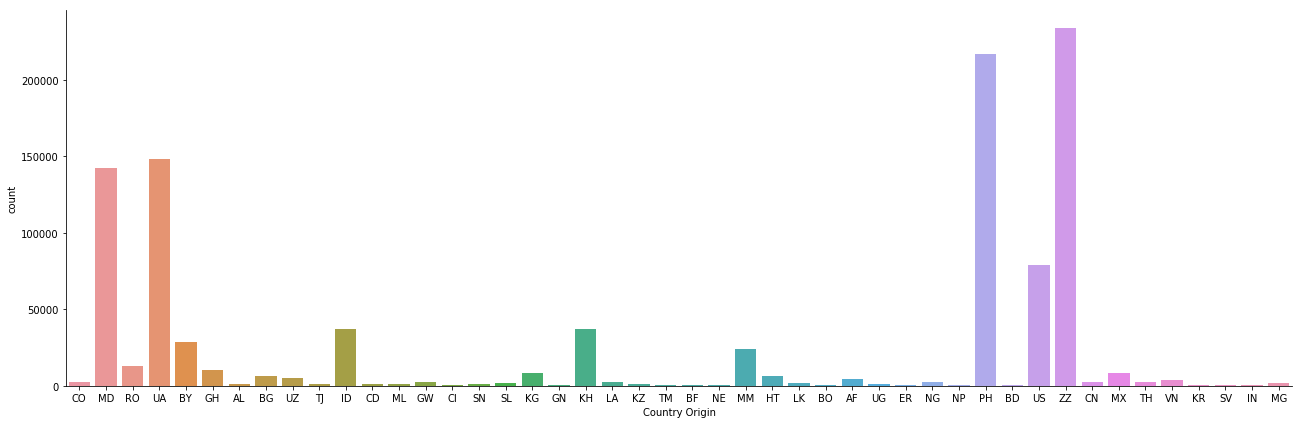

In [19]:
sns.catplot(
    x="Country Origin",
    data=df,
    kind="count",
    height=6,
    aspect=3,
)

The set of rights and duties that a person has with a country because of his/her legal bond with the country. This term is often used interchangeably with nationality, however some states distinguish between nationality and citizenship and provide for different types of nationality of which citizenship is one form. Liberty Asia partners recording this as ‘Country of Origin’ as a proxy for citizenship due to this not being recorded. 

In short, this is WHERE the victims of human trafficking in documented databases are coming from.

- Values based on ISO 3166-1 Alpha-2 Codes

Country values worth mentioning, ranking from greatest number of victims to least:
- 1) ZZ = Unknown Country
- 2) PH = Philippines
- 3) UA = Ukraine
- 4) MD = Moldova
- 5) US = United States
- 6) KH = Cambodia
- 7) ID = Indonesia
- 8) BY = Belarus
- 9) MM = Myanmar

### COUNTRY OF EXPLOITATION

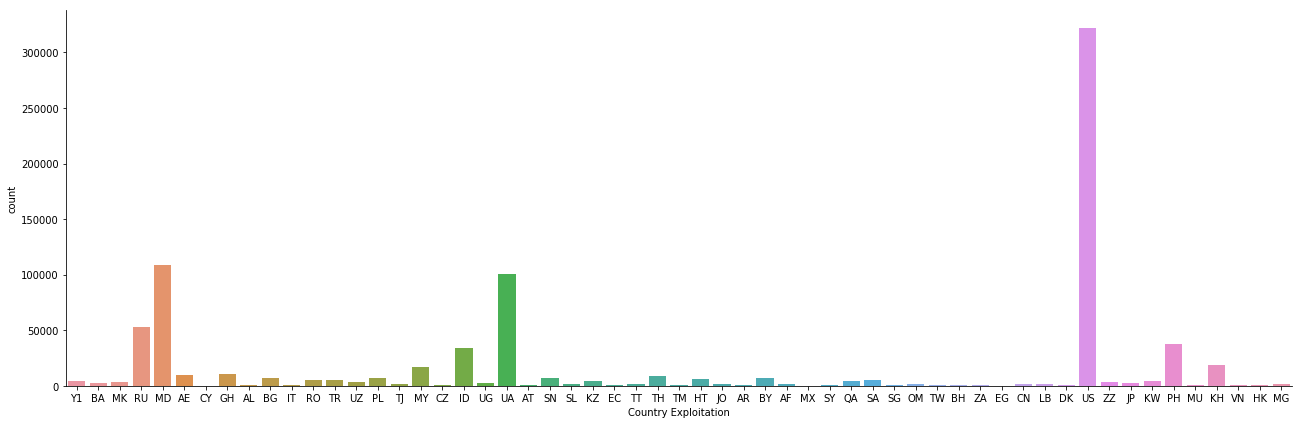

In [20]:
sns.catplot(
    x="Country Exploitation",
    data=df,
    kind="count",
    height=6,
    aspect=3,
)

Indicates the last country where the victim was exploited. In the context of human trafficking data, this is also referred to as the “country of destination” (as opposed to “country of origin” if human trafficking was across borders). In instances where there is no data for the last country of exploitation, a proxy has been created to capture as much data as possible about the country the victim was exploited in. The proxy uses data about the country in which the victim is first supported/assisted, identified and/or referred, which in the vast majority of cases is de facto the last country of exploitation. 

In short, this is WHERE victims of human trafficking are going among documented database cases.

- Values based on ISO 3166-1 Alpha-2 Codes

Country values worth mentioned, ranking from greatest number of victims to least:
- 1) US = United States
- 2) MD = Moldova
- 3) UA = Ukraine
- 4) RU = Russia
- 5) PH = Philippines
- 6) ID = Indonesia
- 7) KH = Cambodia

# WHY ARE THEY BEING TRAFFICKED?

### EXPLOITATION TYPE

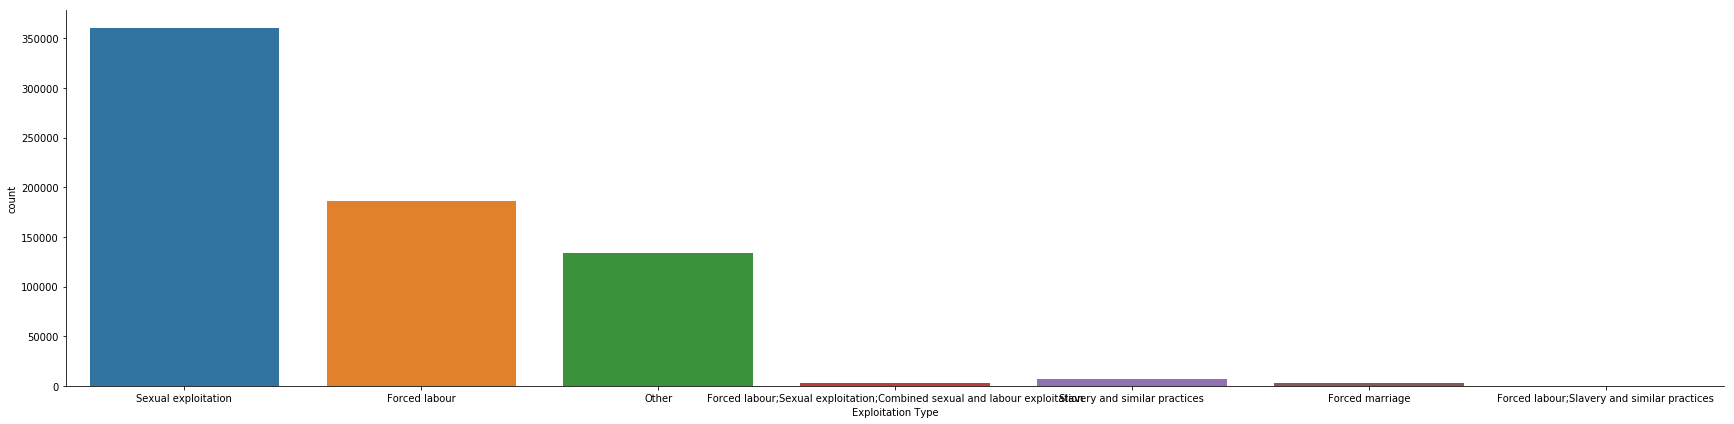

In [21]:
sns.catplot(
    x="Exploitation Type",
    data=df,
    kind="count",
    height=6,
    aspect=4,
)

Concatenated list of the different types of exploitation positively identified.

"Sexual Exploitation" indicates that the purpose for which a victim was trafficked was sexual services,
such as the exploitation of the prostitution of an individual. Typically the exploiter(s) use force,
fraud or coercion to achieve exploitation.

"Forced Labor" indicates that the purpose for which a victim was trafficked was all work or service
which was exacted from the individual, under the threat of a penalty and for which the individual
has not offered himself or herself voluntarily. Sexual services are excluded from this definition.

According to CTDC, category "forced labor" can include any of the following:
- Agriculture/Farms/Animal Husbandry
- Aquafarming/Fishing
- Begging
- Construction
- Domestic Work
- Hospitality/Restaurant/Food Service/Hotel
- Illicit Activities
- Manufacturing/Factory work
- Mining, Quarrying, Oil/Gas Extraction
- Peddling/informal street commerce
- Transportation

### EXPLOITATION TYPE PER GENDER

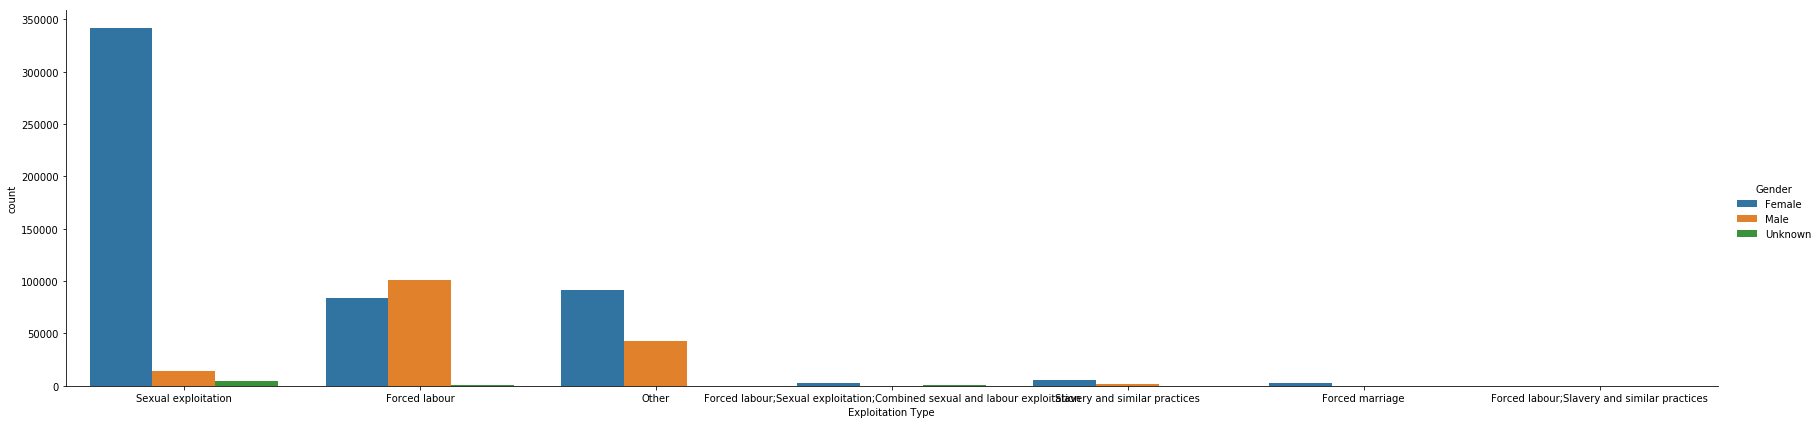

In [22]:
sns.catplot(
    x="Exploitation Type",
    hue="Gender",
    data=df,
    kind="count",
    height=6,
    aspect=4,
)

As you can see in the above graph, among all the victims, sexual exploitation deals almost exclusively with females, where forced labor has a male majority. The ratio, however, between male and female victims of forced labor is still close to 50%.

# WHOSE TRAFFICKING THEM?

### RECRUITER RELATION

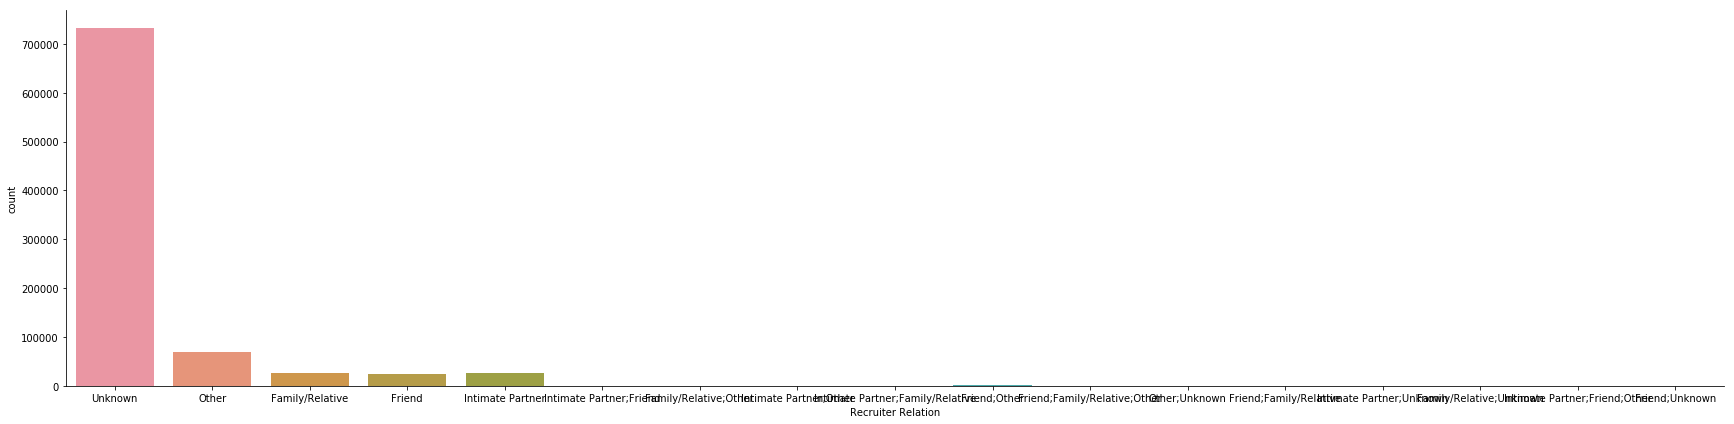

In [23]:
sns.catplot(
    x="Recruiter Relation",
    data=df,
    kind="count",
    height=6,
    aspect=4,
)

Indicates whether a person who initially enticed or obtained the individual into the
situation of exploitation was one with whom the individual has identified having a current or former romantic relationship.

As is expected, the least amount of information is known about recruiters of human trafficking.

# CONCLUSION

This data is only what has been documented in a database. The actual numbers on the global scale are astronomically higher and this presentation neither gives an accurate nor an exhaustive presentation of the entire current global state of human trafficking. Many epicenters for human trafficking remain undiscovered, and for the many that are discovered, we still have very little documented data concerning them. Yet, much insight can be gained from this dataset. One example is when comparing the victim's Country of Origin to their Country of Exploitation. Though we say America is the land of the free and the home of the brave, America is undisputedly the destination for the largest amount of database documented human trafficking cases in the entire world. Thus, among database documented cases, America is the incubator of the largest victim group of modern day slavery in the entire world. 

Another conclusion that can be mined from this data is that, though males are victims of human trafficking, females are by far the greater victim group of human trafficking. The males that are trafficked are so mostly for the purpose of forced labor. Females on the other hand are trafficked mostly for sexual exploitation. 

Would we be brave enough to make that end?..